In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import warnings 
warnings.filterwarnings("ignore") 

# Loading Data

In [2]:
# Reload the data with the correct delimiter and handling of quotes
df = pd.read_csv("bank-full.csv", delimiter=';', quotechar='"')

# Check the first few rows to confirm it loads into the expected 17 columns
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
#Datatypes
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
df.shape

(45211, 17)

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
#Check for duplicates
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


In [8]:
#Check for null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## There are no null values, however there are columns that have values labeled 'Unknown'. 

# Exploratory Data Analysis

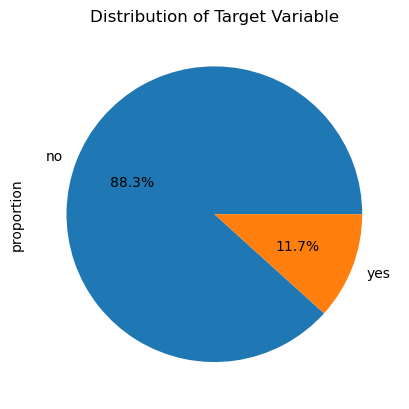

y
no     39922
yes     5289
Name: count, dtype: int64

In [9]:
#plot
df['y'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title("Distribution of Target Variable")
plt.show()

df['y'].value_counts()

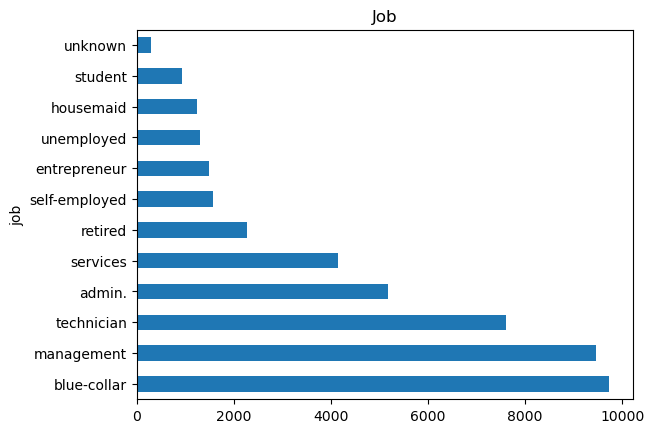

job
blue-collar      21.53
management       20.92
technician       16.80
admin.           11.44
services          9.19
retired           5.01
self-employed     3.49
entrepreneur      3.29
unemployed        2.88
housemaid         2.74
student           2.07
unknown           0.64
Name: proportion, dtype: float64


In [10]:
#Job
df.job.value_counts().plot.barh()
plt.title('Job')
plt.show()

print(df.job.value_counts(normalize=True).mul(100).round(2))

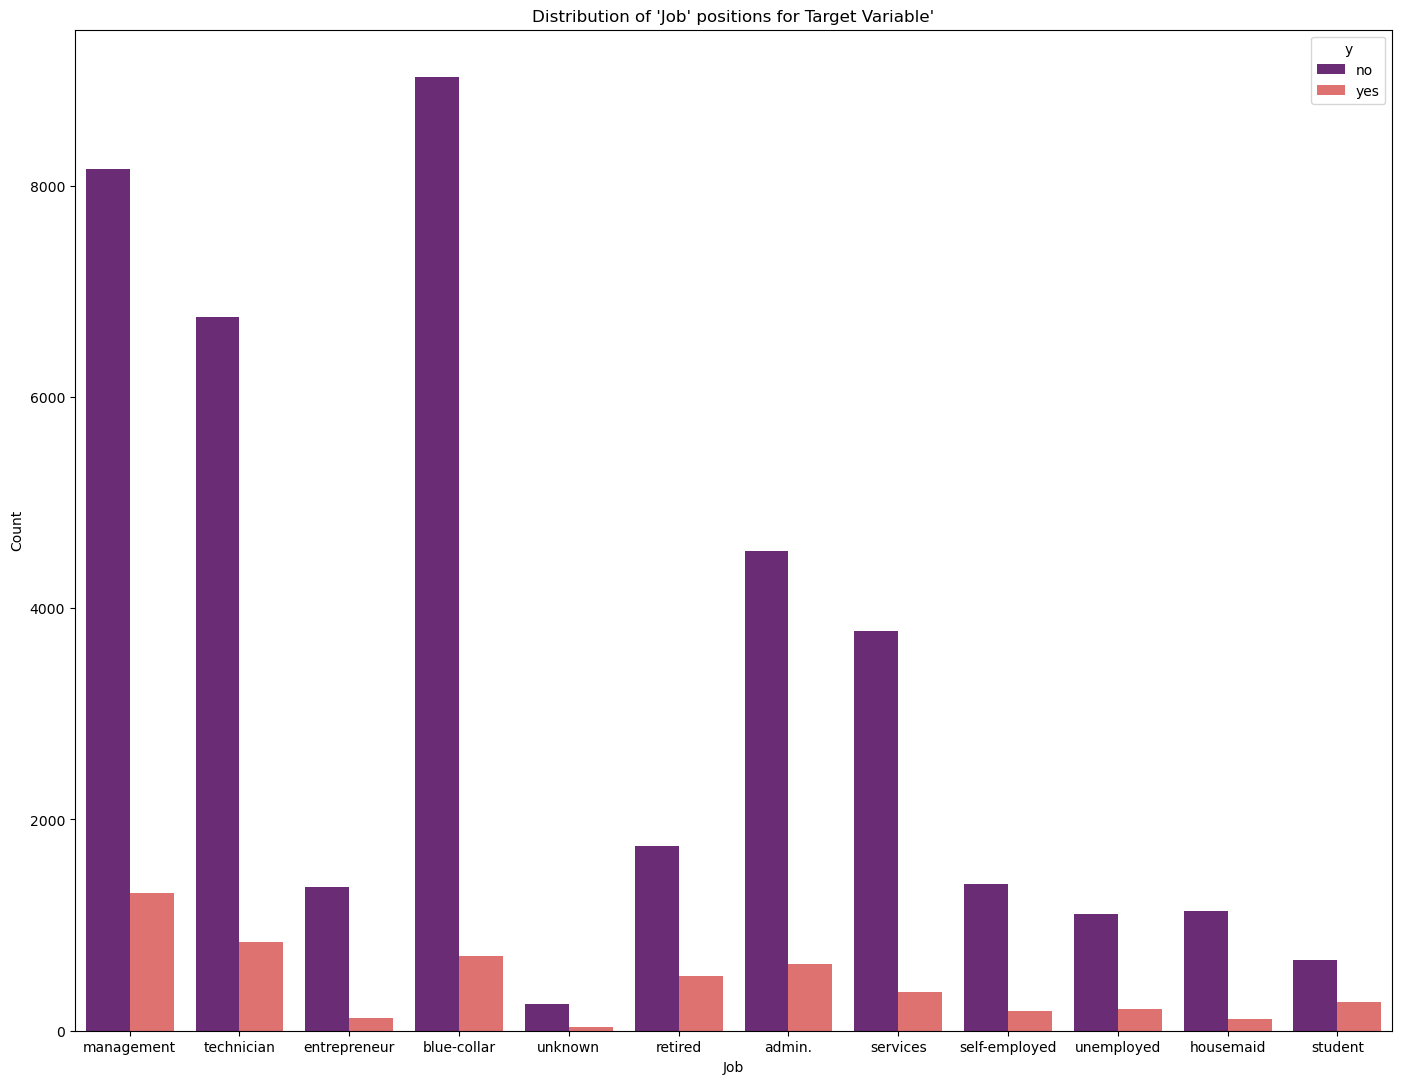

In [11]:
#calculate the percentage of each job status category
#plot 
plt.figure(figsize=(17,13))
sns.countplot(x='job', hue='y', data=df, palette='magma')
plt.title("Distribution of 'Job' positions for Target Variable'")
plt.xlabel("Job")
plt.ylabel("Count")
plt.show()

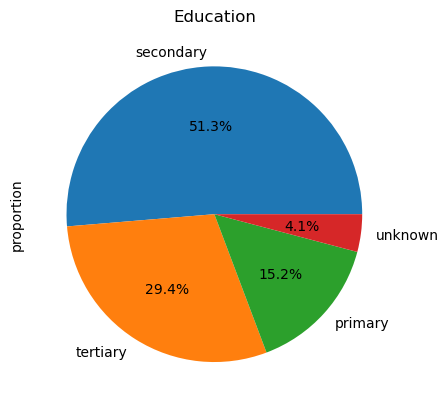

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [12]:
#Calculate the percentage of each education

df.education.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Education')
plt.show()

df.education.value_counts()

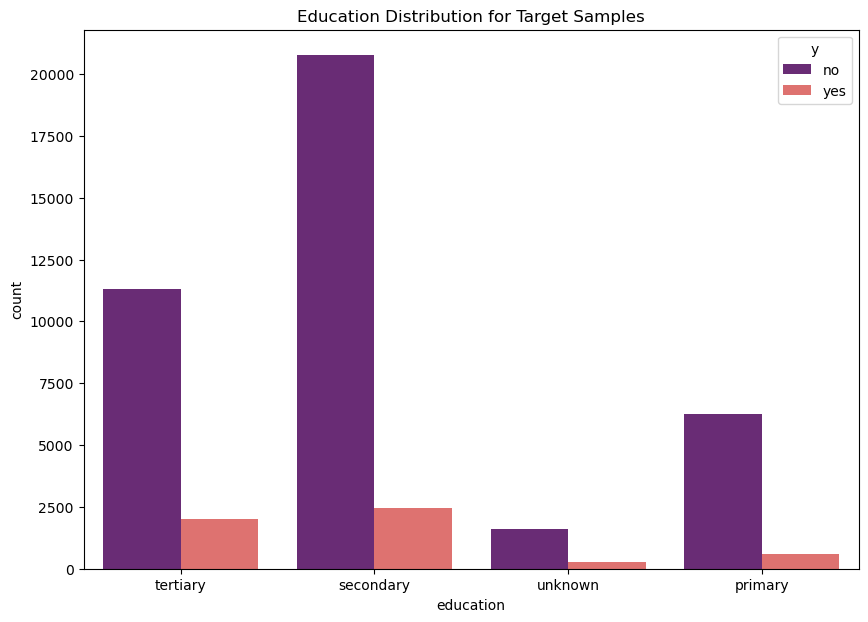

In [13]:
#Distribution of Target Samples based on education

plt.figure(figsize=(10,7))
sns.countplot(x='education', hue='y', data=df, palette='magma')
plt.xlabel('education')
plt.ylabel('count')
plt.title('Education Distribution for Target Samples')
plt.show()

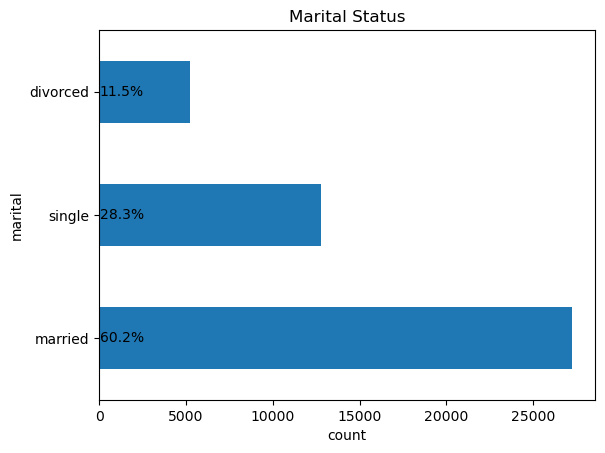

In [14]:
#Marital Status
df.marital.value_counts().plot.barh()

for index, value in enumerate(df.marital.value_counts(normalize=True).mul(100)):
    plt.text(value, index, f"{value:.1f}%", va='center')


plt.xlabel('count')
plt.title("Marital Status")
plt.show()

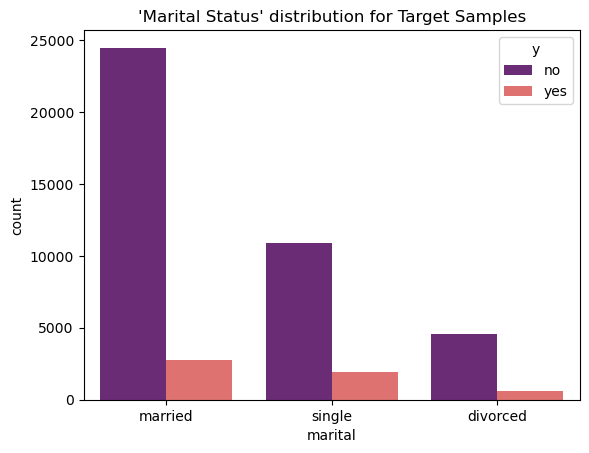

In [15]:
#Target Samples based on marital status
sns.countplot(x='marital', hue='y', data=df, palette='magma')
plt.title("'Marital Status' distribution for Target Samples")
plt.show()

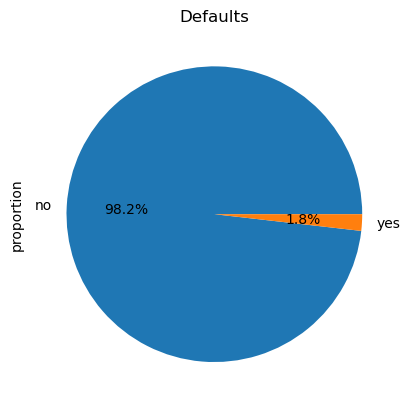

default
no     44396
yes      815
Name: count, dtype: int64

In [16]:
#Default

#Plot
df.default.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title("Defaults")
plt.show()


df.default.value_counts()

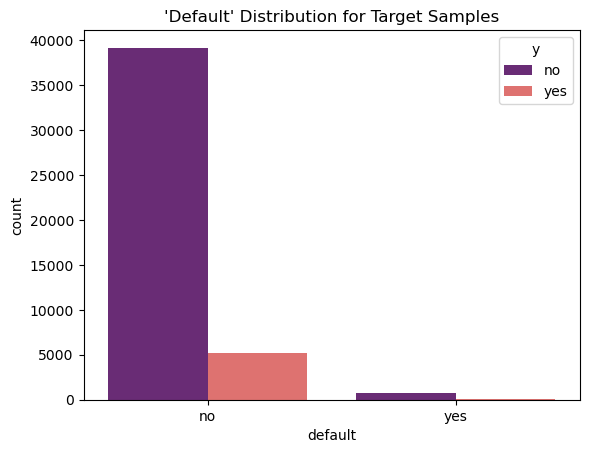

In [17]:
#Distribution of Target Samples based on defaults

sns.countplot(x='default', hue='y', data=df, palette='magma')
plt.title("'Default' Distribution for Target Samples")
plt.show()

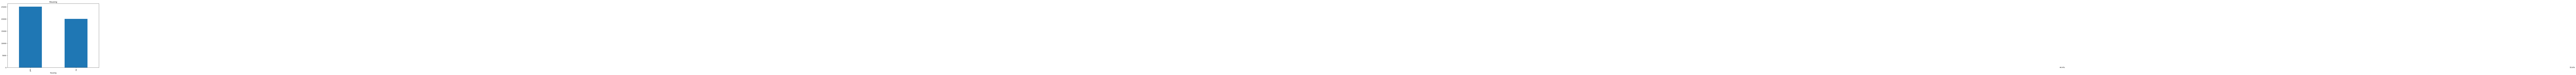

housing
yes    25130
no     20081
Name: count, dtype: int64

In [18]:
#Housing

plt.figure(figsize=(10,7))
df.housing.value_counts().plot.bar()

for index, value in enumerate(df.housing.value_counts(normalize=True).mul(100)):
    plt.text(value, index, f"{value:.1f}%", va='center')

plt.title("Housing")
plt.show()

df.housing.value_counts()


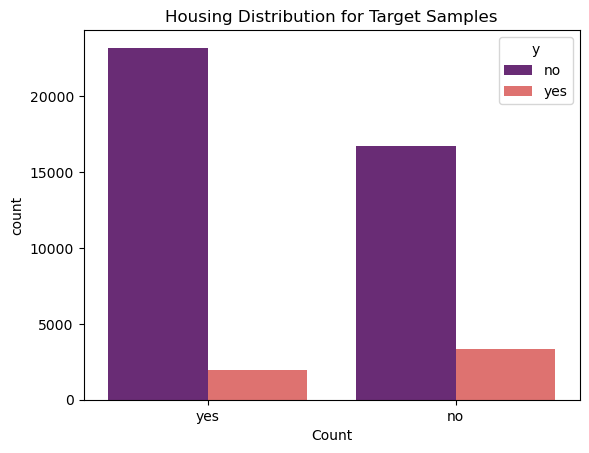

housing
yes    25130
no     20081
Name: count, dtype: int64

In [19]:
#Housing-Distribution of Target Samples

sns.countplot(x='housing', hue='y', data=df, palette='magma')

plt.xlabel('Count')
plt.title("Housing Distribution for Target Samples")
plt.show()

df.housing.value_counts()

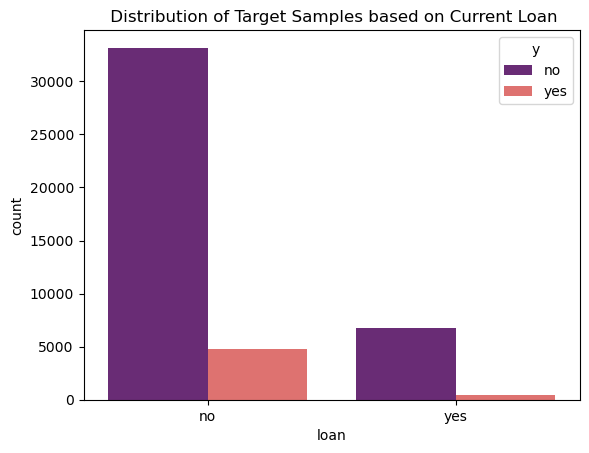

loan
no     37967
yes     7244
Name: count, dtype: int64

In [20]:
#Loan- Distribution of Target Samples

sns.countplot(x='loan', hue='y', data=df, palette='magma')
plt.title(" Distribution of Target Samples based on Current Loan")
plt.show()

df.loan.value_counts()

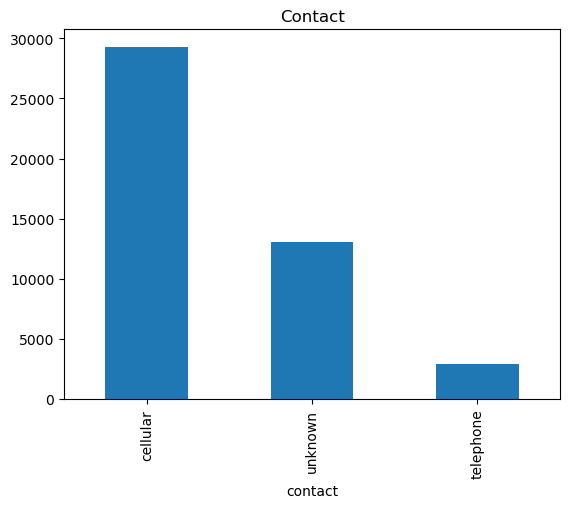

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [21]:
#Contact

df.contact.value_counts().plot.bar()

plt.title('Contact')
plt.show()

df.contact.value_counts()


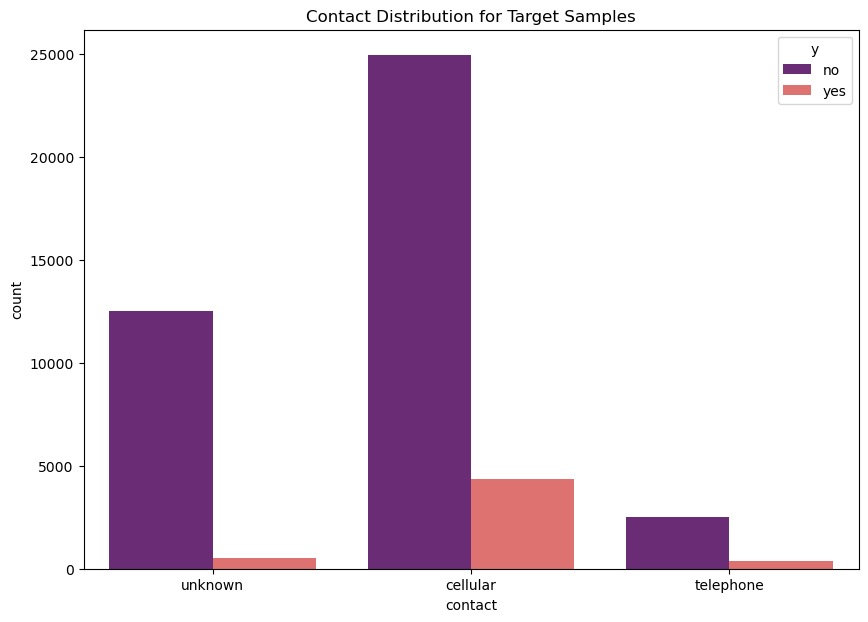

In [22]:
#Contact-Distribution of Target Samples

plt.figure(figsize=(10,7))
sns.countplot(x='contact', hue='y', data=df, palette='magma')
plt.title('Contact Distribution for Target Samples')
plt.show()


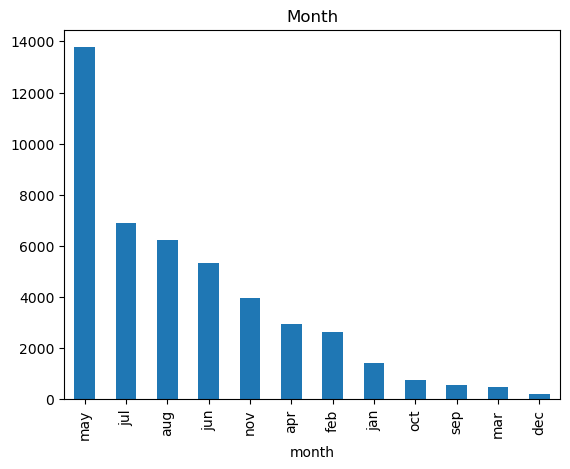

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [23]:
#Month

df.month.value_counts().plot.bar()

plt.title('Month')
plt.show()

df.month.value_counts()

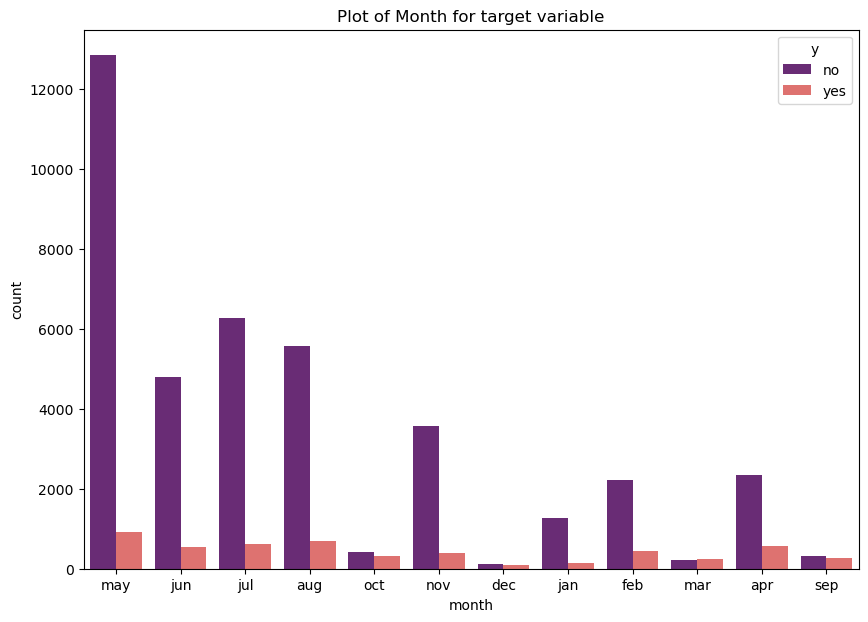

In [24]:
#Month

plt.figure(figsize=(10,7))
sns.countplot(x='month', hue='y', data=df, palette='magma')
plt.title('Plot of Month for target variable')
plt.show()


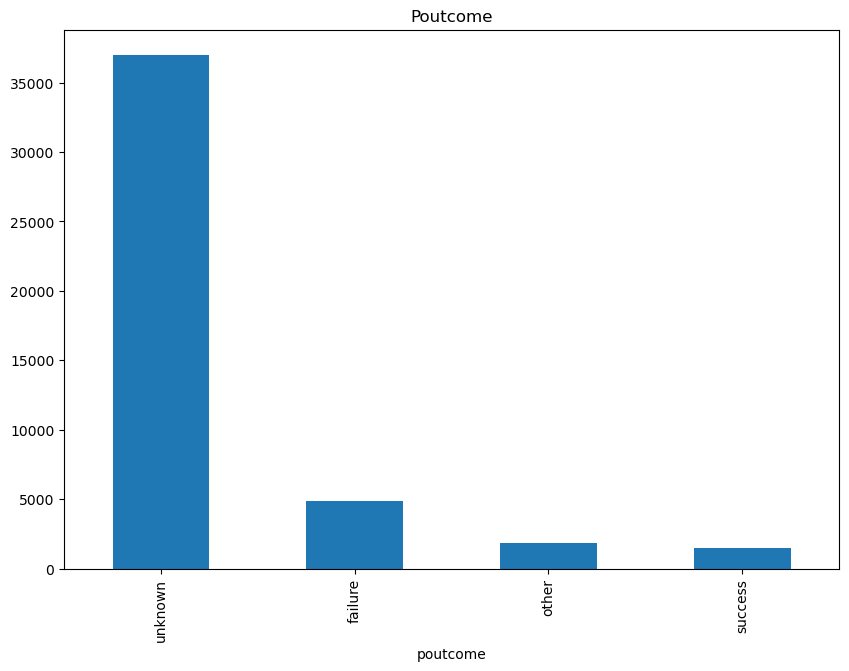

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [25]:
#Poutcome

plt.figure(figsize=(10,7))
df.poutcome.value_counts().plot.bar()

plt.title('Poutcome')
plt.show()

df.poutcome.value_counts()

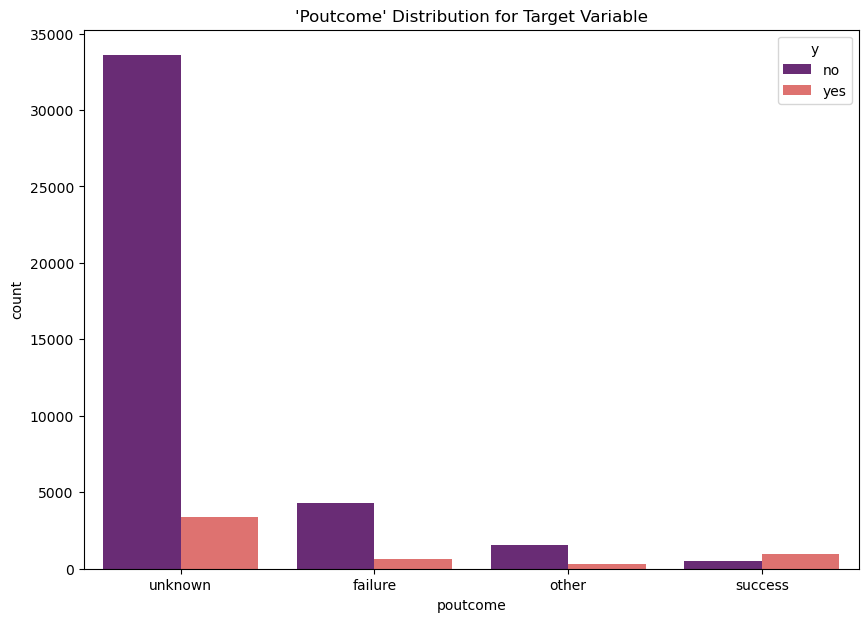

In [26]:
#Poutcome-Distribution of Target Variables

plt.figure(figsize=(10,7))
sns.countplot(x='poutcome', hue='y', data=df, palette='magma')
plt.title("'Poutcome' Distribution for Target Variable")
plt.show()

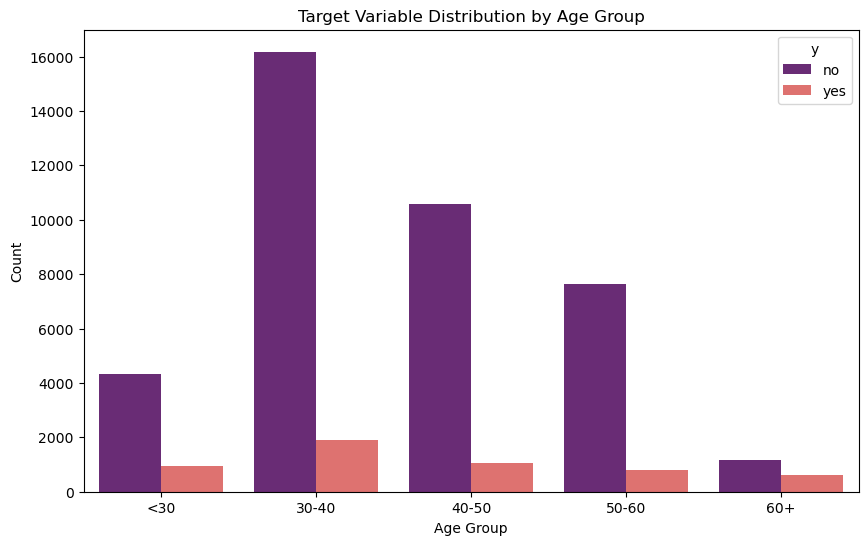

In [27]:
#Age-Distribution of Target Variables

# Define age bins and labels
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']


#Create an age range column
df['age_range'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

#plot
plt.figure(figsize=(10, 6))
sns.countplot(x='age_range', hue='y', data=df, palette='magma')
plt.title('Target Variable Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

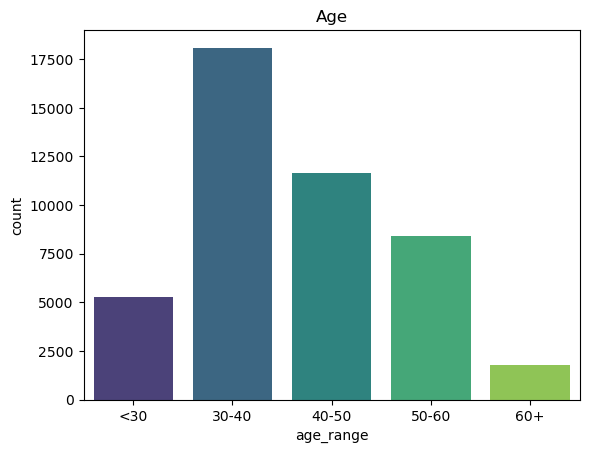

In [28]:
#Age

sns.countplot(x='age_range', data=df, palette='viridis')
plt.title('Age')
plt.show()


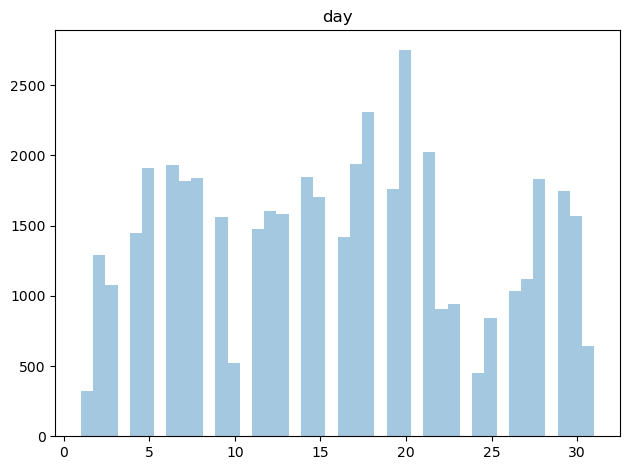

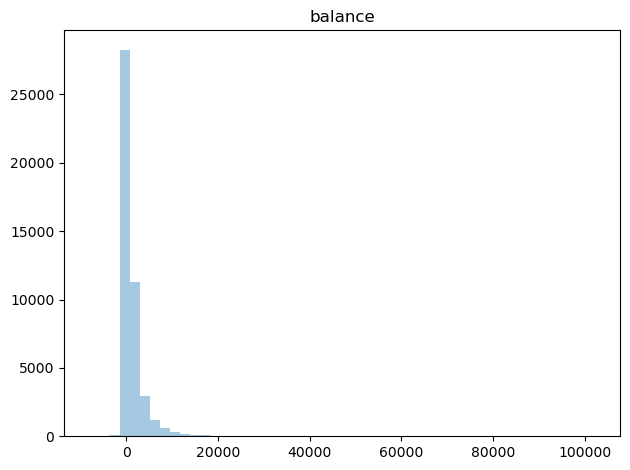

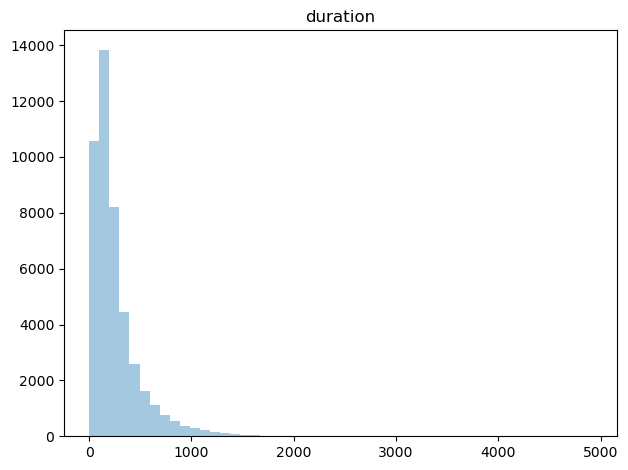

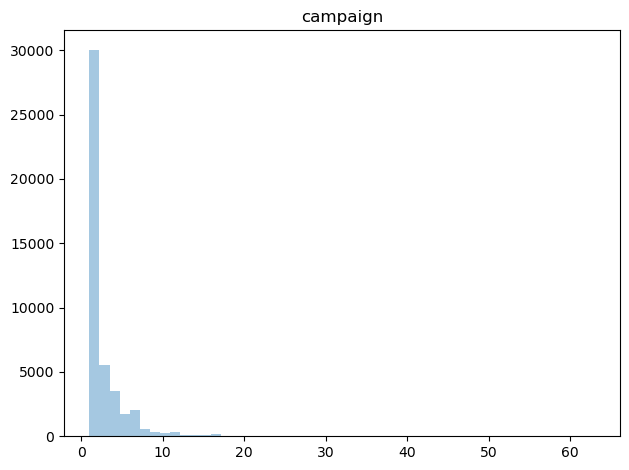

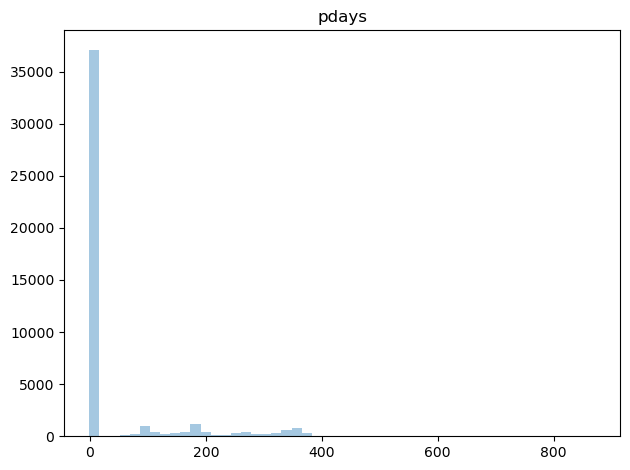

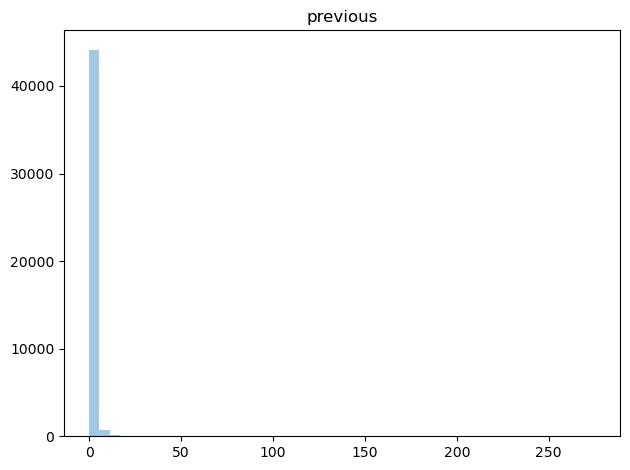

In [29]:
numerical_variables = ['day', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in numerical_variables:
    sns.distplot(x=df[col], kde = False)
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [30]:
df['y']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

# Solution:

In [31]:
# Change categorical to numerical values by encoding 
df['y']= df['y'].map({'yes':1, 'no':0})

In [32]:
print(df['y'])

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64


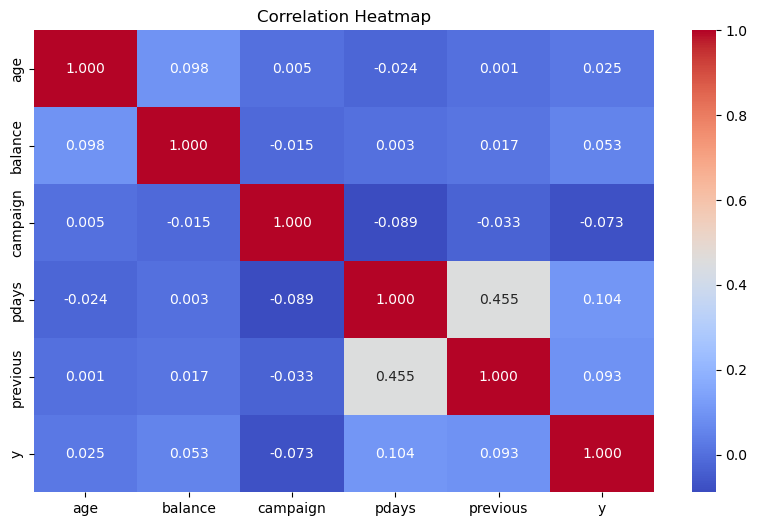

In [33]:
# correlation matrix with respects to 'y'

ndf= df[['age', 'balance', 'campaign', 'pdays', 'previous', 'y']]

corr = ndf.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot=True, fmt=".3f", cmap='coolwarm')  
plt.title("Correlation Heatmap")
plt.show()

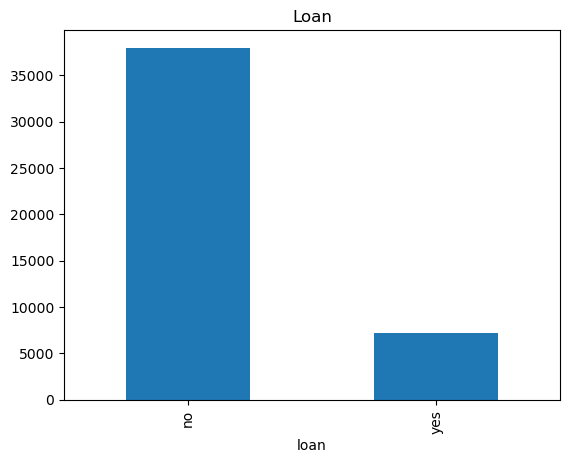

loan
no     37967
yes     7244
Name: count, dtype: int64

In [34]:
#Loan

df.loan.value_counts().plot.bar()

plt.title('Loan')
plt.show()

df.loan.value_counts()

In [35]:
# Count the values in the last column
value_counts = df.iloc[:, -1].value_counts()

# Calculate percentages
total = value_counts.sum()
percentages = (value_counts / total) * 100

print("\nPercentages:")
for value, count in value_counts.items():
    percentage = percentages[value]
    print(f"{value}: {count} ({percentage:.2f}%)")
    


Percentages:
30-40: 18089 (40.01%)
40-50: 11655 (25.78%)
50-60: 8410 (18.60%)
<30: 5273 (11.66%)
60+: 1784 (3.95%)


### Distribution is heavily skewed.

# Solution:

In [36]:
#balance the data
def balance_csv(input_file, output_file, sample_size=None):
    # Read the CSV file
    df = pd.read_csv(input_file, sep=';')

    # Get the target column (last column)
    target_col = df.columns[-1]

    # Group by the target column
    grouped = df.groupby(target_col, group_keys=False)  # Exclude grouping keys from being added to the output

    # Determine the sample size for each group
    if sample_size is None:
        sample_size = grouped.size().min()
    else:
        sample_size = min(sample_size // 2, grouped.size().min())

    # Take a random sample from each group
    sampled = grouped.apply(lambda x: x.sample(n=sample_size, random_state=42))

    # Shuffle the DataFrame to mix 'yes' and 'no' rows
    df_balanced = sampled.sample(frac=1, random_state=42).reset_index(drop=True)

    # Write to output file
    df_balanced.to_csv(output_file, sep=';', index=False)

    # Print statistics
    value_counts = df_balanced[target_col].value_counts()
    print(f"Output file created: {output_file}")
    print(f"Yes count: {value_counts.get('yes', 0)}")
    print(f"No count: {value_counts.get('no', 0)}")

# Usage
balance_csv('bank-full.csv', 'bank_balanced.csv')

Output file created: bank_balanced.csv
Yes count: 5289
No count: 5289


In [37]:
df1 = pd.read_csv("bank_balanced.csv", delimiter=';')

df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34,services,married,secondary,no,1076,no,no,cellular,12,may,152,1,182,6,success,yes
1,27,technician,single,secondary,no,2,yes,yes,cellular,6,may,554,2,356,1,failure,yes
2,30,admin.,single,secondary,no,270,no,no,cellular,30,apr,437,1,80,1,success,yes
3,28,technician,single,unknown,no,0,yes,no,cellular,27,oct,96,1,267,1,failure,yes
4,30,student,single,tertiary,no,2539,no,no,telephone,5,mar,199,5,-1,0,unknown,yes



Outliers in column 'age':
Number of outliers: 487
Percentage of outliers: 1.08%

Outliers in column 'balance':
Number of outliers: 4729
Percentage of outliers: 10.46%

Outliers in column 'duration':
Number of outliers: 3235
Percentage of outliers: 7.16%

Outliers in column 'campaign':
Number of outliers: 3064
Percentage of outliers: 6.78%

Outliers in column 'pdays':
Number of outliers: 8257
Percentage of outliers: 18.26%

Outliers in column 'previous':
Number of outliers: 8257
Percentage of outliers: 18.26%


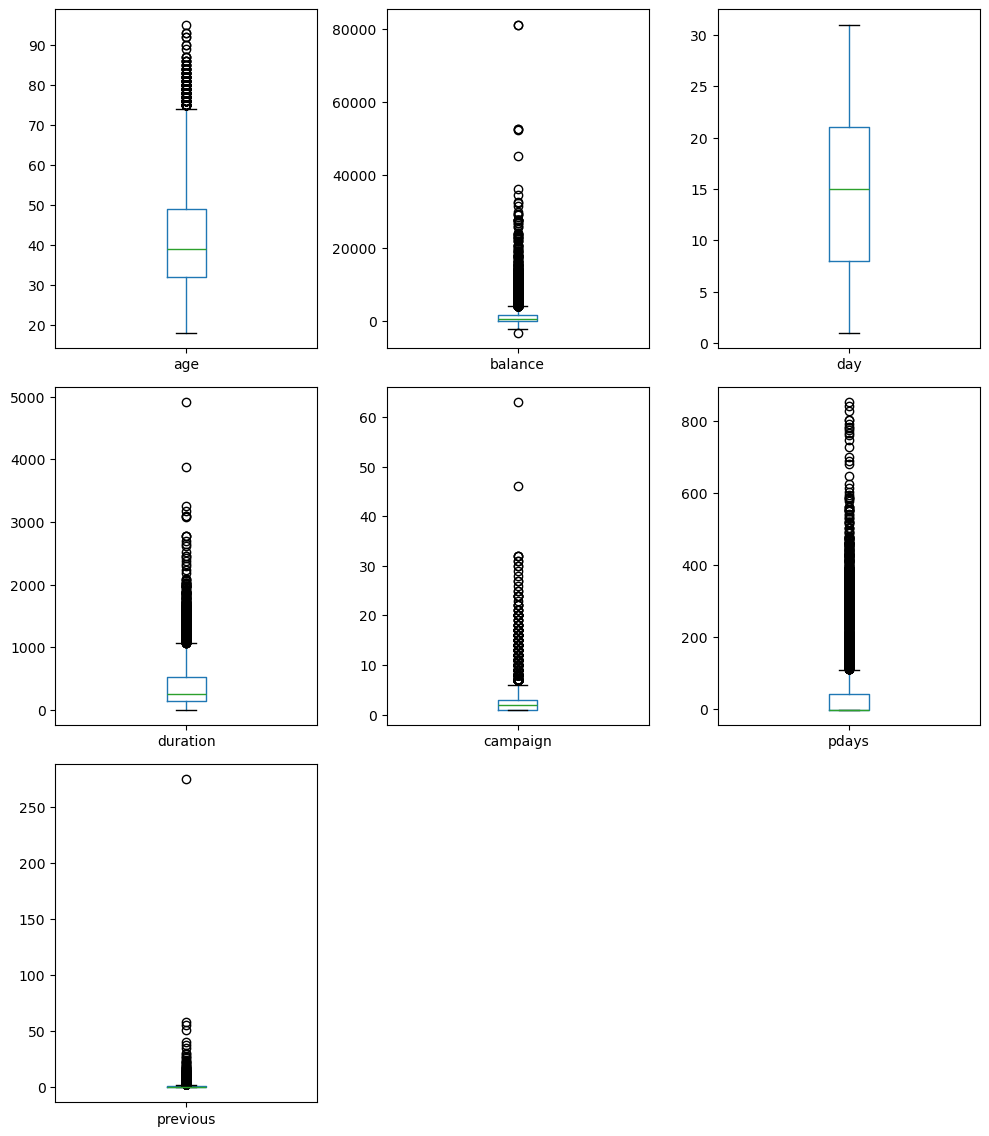

In [38]:
#Check for outliers 

cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous']

        
plt.figure(figsize=(10,15))

for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    df1.boxplot(col)
    plt.grid()
    plt.tight_layout()


def check_outliers(df1, delimiter=';'):
    df1 = pd.read_csv('bank_balanced.csv', delimiter=delimiter)

    def find_outliers(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return series[(series < lower_bound) | (series > upper_bound)]

    for column in df1.select_dtypes(include=[np.number]).columns:
        outliers = find_outliers(df[column])
        if not outliers.empty:
            print(f"\nOutliers in column '{column}':")
            print(f"Number of outliers: {len(outliers)}")
            print(f"Percentage of outliers: {(len(outliers) / len(df[column])) * 100:.2f}%")

check_outliers('bank_balanced.csv')


# Solution:

In [39]:
#Impute the mean to diminish outliers
def impute_outliers(df1):
    for column in ["balance","campaign", "duration", "pdays", "previous"]:
        if column == "pdays":
            valid_data = df1[df1[column] != -1][column]
        elif column == "previous":
            valid_data = df1[df1[column] != 0][column]
        else:
            valid_data = df1[column]

        mean = valid_data.mean()
        std = valid_data.std()
        lower_limit = mean - std
        upper_limit = mean + std

        # Only impute values that are not -1 for pdays or 0 for previous
        if column == "pdays":
            df1.loc[(df1[column] < lower_limit) & (df1[column] != -1), column] = mean
            df1.loc[(df1[column] > upper_limit) & (df1[column] != -1), column] = mean
        elif column == "previous":
            df1.loc[(df[column] < lower_limit) & (df1[column] != 0), column] = mean
            df1.loc[(df[column] > upper_limit) & (df1[column] != 0), column] = mean
        else:
            df1.loc[df[column] < lower_limit, column] = mean
            df1.loc[df[column] > upper_limit, column] = mean

    return df

# Impute outliers
df_imputed = impute_outliers(df1)

def check_outliers(df1):
    def find_outliers(series, ignore_value=None):
        if ignore_value is not None:
            series = series[series != ignore_value]
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return series[(series < lower_bound) | (series > upper_bound)]

    for column in df.select_dtypes(include=[np.number]).columns:
        if column == "pdays":
            outliers = find_outliers(df[column], ignore_value=-1)
        elif column == "previous":
            outliers = find_outliers(df[column], ignore_value=0)
        else:
            outliers = find_outliers(df[column])

        print(f"\nOutliers in column '{column}':")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Percentage of outliers: {(len(outliers) / len(df[column])) * 100:.2f}%")


print("Check imputed df: ")

check_outliers(df_imputed)

Check imputed df: 

Outliers in column 'age':
Number of outliers: 487
Percentage of outliers: 1.08%

Outliers in column 'balance':
Number of outliers: 4729
Percentage of outliers: 10.46%

Outliers in column 'day':
Number of outliers: 0
Percentage of outliers: 0.00%

Outliers in column 'duration':
Number of outliers: 3235
Percentage of outliers: 7.16%

Outliers in column 'campaign':
Number of outliers: 3064
Percentage of outliers: 6.78%

Outliers in column 'pdays':
Number of outliers: 49
Percentage of outliers: 0.11%

Outliers in column 'previous':
Number of outliers: 453
Percentage of outliers: 1.00%

Outliers in column 'y':
Number of outliers: 5289
Percentage of outliers: 11.70%


In [40]:
#Skewness in numerical columns

def check_skewness(df, printing=True):
    highly_skewed_columns = []
    def interpret_skewness(sk):
        if sk < -1:
            return "Highly Negatively Skewed"
        elif -1 <= sk < -0.5:
            return "Moderately Negatively Skewed"
        elif -0.5 <= sk < 0:
            return "Approximately Symmetric (Slightly Negative)"
        elif sk == 0:
            return "Perfectly Symmetric"
        elif 0 < sk < 0.5:
            return "Approximately Symmetric (Slightly Positive)"
        elif 0.5 <= sk < 1:
            return "Moderately Positively Skewed"
        else:
            return "Highly Positively Skewed"

# Check each numeric column for skewness
    for column in df2.select_dtypes(include=[np.number]).columns:
        sk = skew(df2[column].dropna())
        interpretation = interpret_skewness(sk)
        if printing:
            print(f"\nColumn: {column}")
            print(f"Skewness: {sk:.4f}")
            print(f"Interpretation: {interpretation}")
        if abs(sk) > 1:
            highly_skewed_columns.append(column)

    return highly_skewed_columns

# Usage
df2 = df_imputed
check_skewness(df2)


Column: age
Skewness: 0.6848
Interpretation: Moderately Positively Skewed

Column: balance
Skewness: 8.3600
Interpretation: Highly Positively Skewed

Column: day
Skewness: 0.0931
Interpretation: Approximately Symmetric (Slightly Positive)

Column: duration
Skewness: 3.1442
Interpretation: Highly Positively Skewed

Column: campaign
Skewness: 4.8985
Interpretation: Highly Positively Skewed

Column: pdays
Skewness: 2.6156
Interpretation: Highly Positively Skewed

Column: previous
Skewness: 41.8451
Interpretation: Highly Positively Skewed

Column: y
Skewness: 2.3834
Interpretation: Highly Positively Skewed


['balance', 'duration', 'campaign', 'pdays', 'previous', 'y']

# Solution: Replacing values w/ log transformation to preserve data

In [41]:
def apply_log_transformations(df, log_columns):
    df_transformed = df.copy()

    for col in log_columns:
        if col in df_transformed.columns:
            min_value = df_transformed[col].min()
            if min_value <= 0:
                df_transformed[col] = df_transformed[col] - min_value + 1
            df_transformed[col] = np.log1p(df_transformed[col])

    return df_transformed
    
df2 = df_imputed
log_columns = check_skewness(df, printing=False)
prev_len = 0
while len(log_columns) != prev_len:
    prev_len = len(log_columns)
    df = apply_log_transformations(df, check_skewness(df, printing=False))
    log_columns = check_skewness(df, printing=False)
check_skewness(df2)


Column: age
Skewness: 0.6848
Interpretation: Moderately Positively Skewed

Column: balance
Skewness: 8.3600
Interpretation: Highly Positively Skewed

Column: day
Skewness: 0.0931
Interpretation: Approximately Symmetric (Slightly Positive)

Column: duration
Skewness: 3.1442
Interpretation: Highly Positively Skewed

Column: campaign
Skewness: 4.8985
Interpretation: Highly Positively Skewed

Column: pdays
Skewness: 2.6156
Interpretation: Highly Positively Skewed

Column: previous
Skewness: 41.8451
Interpretation: Highly Positively Skewed

Column: y
Skewness: 2.3834
Interpretation: Highly Positively Skewed


['balance', 'duration', 'campaign', 'pdays', 'previous', 'y']

# Model Selection & Model Building

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [43]:
#Load cleaned dataset

df2 = pd.read_csv("bank_balanced.csv", delimiter = ';')
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34,services,married,secondary,no,1076,no,no,cellular,12,may,152,1,182,6,success,yes
1,27,technician,single,secondary,no,2,yes,yes,cellular,6,may,554,2,356,1,failure,yes
2,30,admin.,single,secondary,no,270,no,no,cellular,30,apr,437,1,80,1,success,yes
3,28,technician,single,unknown,no,0,yes,no,cellular,27,oct,96,1,267,1,failure,yes
4,30,student,single,tertiary,no,2539,no,no,telephone,5,mar,199,5,-1,0,unknown,yes


In [44]:
# Change categorical to numerical values by encoding 
df2['y']= df2['y'].map({'yes':1, 'no':0})

In [45]:
df2['y']

0        1
1        1
2        1
3        1
4        1
        ..
10573    1
10574    0
10575    1
10576    0
10577    1
Name: y, Length: 10578, dtype: int64


Outliers in column 'age':
Number of outliers: 162
Percentage of outliers: 1.53%

Outliers in column 'balance':
Number of outliers: 1019
Percentage of outliers: 9.63%

Outliers in column 'duration':
Number of outliers: 559
Percentage of outliers: 5.28%

Outliers in column 'campaign':
Number of outliers: 551
Percentage of outliers: 5.21%

Outliers in column 'pdays':
Number of outliers: 1895
Percentage of outliers: 17.91%

Outliers in column 'previous':
Number of outliers: 1188
Percentage of outliers: 11.23%


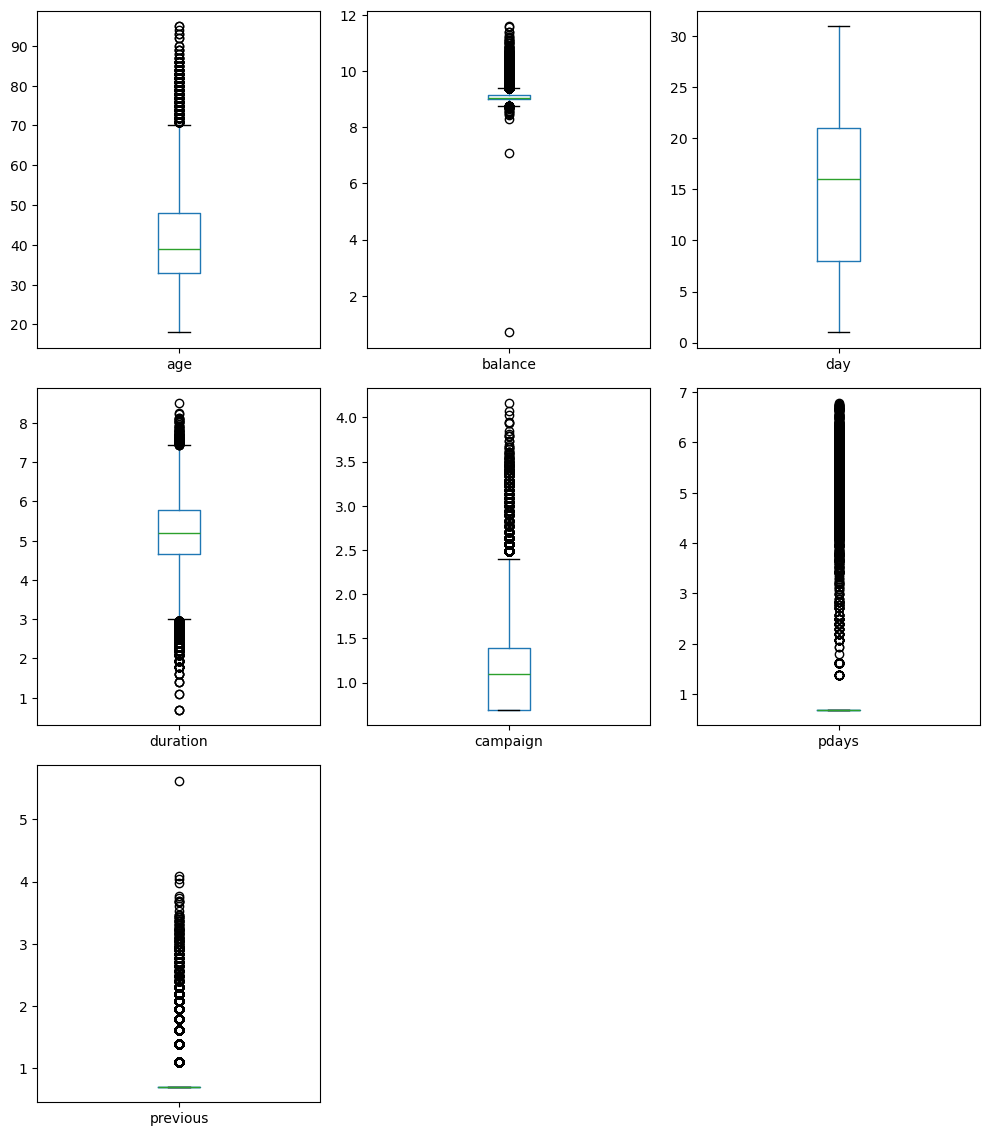

In [46]:
#Check for outliers 

cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous']

        
plt.figure(figsize=(10,15))

for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()


def check_outliers(df2, delimiter=';'):
    df2 = pd.read_csv('bank_balanced.csv', delimiter=delimiter)

    def find_outliers(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return series[(series < lower_bound) | (series > upper_bound)]

    for column in df2.select_dtypes(include=[np.number]).columns:
        outliers = find_outliers(df2[column])
        if not outliers.empty:
            print(f"\nOutliers in column '{column}':")
            print(f"Number of outliers: {len(outliers)}")
            print(f"Percentage of outliers: {(len(outliers) / len(df2[column])) * 100:.2f}%")

check_outliers('bank_balanced.csv')


In [47]:
#Fix outliers 

#Impute the mean to diminish outliers
def impute_outliers(df2):
    for column in ["balance","campaign", "duration", "pdays", "previous"]:
        if column == "pdays":
            valid_data = df2[df2[column] != -1][column]
        elif column == "previous":
            valid_data = df2[df2[column] != 0][column]
        else:
            valid_data = df2[column]

        mean = valid_data.mean()
        std = valid_data.std()
        lower_limit = mean - std
        upper_limit = mean + std

        # Only impute values that are not -1 for pdays or 0 for previous
        if column == "pdays":
            df2.loc[(df2[column] < lower_limit) & (df2[column] != -1), column] = mean
            df2.loc[(df2[column] > upper_limit) & (df2[column] != -1), column] = mean
        elif column == "previous":
            df2.loc[(df2[column] < lower_limit) & (df2[column] != 0), column] = mean
            df2.loc[(df2[column] > upper_limit) & (df2[column] != 0), column] = mean
        else:
            df2.loc[df2[column] < lower_limit, column] = mean
            df2.loc[df2[column] > upper_limit, column] = mean

    return df

# Impute outliers
df_imputed = impute_outliers(df2)

def check_outliers(df2):
    def find_outliers(series, ignore_value=None):
        if ignore_value is not None:
            series = series[series != ignore_value]
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return series[(series < lower_bound) | (series > upper_bound)]

    for column in df2.select_dtypes(include=[np.number]).columns:
        if column == "pdays":
            outliers = find_outliers(df2[column], ignore_value=-1)
        elif column == "previous":
            outliers = find_outliers(df2[column], ignore_value=0)
        else:
            outliers = find_outliers(df2[column])

        print(f"\nOutliers in column '{column}':")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Percentage of outliers: {(len(outliers) / len(df2[column])) * 100:.2f}%")

df2 = pd.read_csv('bank_balanced.csv', delimiter=';')

print("Check outliers for original df & imputed df: ")
check_outliers(df2)
print('-------------------------')
check_outliers(df_imputed)

Check outliers for original df & imputed df: 

Outliers in column 'age':
Number of outliers: 162
Percentage of outliers: 1.53%

Outliers in column 'balance':
Number of outliers: 1019
Percentage of outliers: 9.63%

Outliers in column 'day':
Number of outliers: 0
Percentage of outliers: 0.00%

Outliers in column 'duration':
Number of outliers: 559
Percentage of outliers: 5.28%

Outliers in column 'campaign':
Number of outliers: 551
Percentage of outliers: 5.21%

Outliers in column 'pdays':
Number of outliers: 26
Percentage of outliers: 0.25%

Outliers in column 'previous':
Number of outliers: 153
Percentage of outliers: 1.45%
-------------------------

Outliers in column 'age':
Number of outliers: 487
Percentage of outliers: 1.08%

Outliers in column 'balance':
Number of outliers: 4072
Percentage of outliers: 9.01%

Outliers in column 'day':
Number of outliers: 0
Percentage of outliers: 0.00%

Outliers in column 'duration':
Number of outliers: 1150
Percentage of outliers: 2.54%

Outliers

In [48]:
#Skewness in numerical columns

def check_skewness(df_imputed, printing=True):
    highly_skewed_columns = []
    def interpret_skewness(sk):
        if sk < -1:
            return "Highly Negatively Skewed"
        elif -1 <= sk < -0.5:
            return "Moderately Negatively Skewed"
        elif -0.5 <= sk < 0:
            return "Approximately Symmetric (Slightly Negative)"
        elif sk == 0:
            return "Perfectly Symmetric"
        elif 0 < sk < 0.5:
            return "Approximately Symmetric (Slightly Positive)"
        elif 0.5 <= sk < 1:
            return "Moderately Positively Skewed"
        else:
            return "Highly Positively Skewed"

# Check each numeric column for skewness
    for column in df_imputed.select_dtypes(include=[np.number]).columns:
        sk = skew(df_imputed[column].dropna())
        interpretation = interpret_skewness(sk)
        if printing:
            print(f"\nColumn: {column}")
            print(f"Skewness: {sk:.4f}")
            print(f"Interpretation: {interpretation}")
        if abs(sk) > 1:
            highly_skewed_columns.append(column)

    return highly_skewed_columns

# Usage
check_skewness(df_imputed)


Column: age
Skewness: 0.6848
Interpretation: Moderately Positively Skewed

Column: balance
Skewness: 1.4669
Interpretation: Highly Positively Skewed

Column: day
Skewness: 0.0931
Interpretation: Approximately Symmetric (Slightly Positive)

Column: duration
Skewness: -0.4055
Interpretation: Approximately Symmetric (Slightly Negative)

Column: campaign
Skewness: 1.3262
Interpretation: Highly Positively Skewed

Column: pdays
Skewness: 1.7250
Interpretation: Highly Positively Skewed

Column: previous
Skewness: 2.9195
Interpretation: Highly Positively Skewed

Column: y
Skewness: 2.3834
Interpretation: Highly Positively Skewed


['balance', 'campaign', 'pdays', 'previous', 'y']

In [49]:
def apply_log_transformations(df_imputed, log_columns):
    df_transformed = df_imputed.copy()

    for col in log_columns:
        if col in df_transformed.columns:
            min_value = df_transformed[col].min()
            if min_value <= 0:
                df_transformed[col] = df_transformed[col] - min_value + 1
            df_transformed[col] = np.log1p(df_transformed[col])

    return df_transformed
    
log_columns = check_skewness(df_imputed, printing=False)
prev_len = 0
while len(log_columns) != prev_len:
    prev_len = len(log_columns)
    df = apply_log_transformations(df_imputed, check_skewness(df_imputed, printing=False))
    log_columns = check_skewness(df_imputed, printing=False)
check_skewness(df)


Column: age
Skewness: 0.6848
Interpretation: Moderately Positively Skewed

Column: balance
Skewness: -10.1261
Interpretation: Highly Negatively Skewed

Column: day
Skewness: 0.0931
Interpretation: Approximately Symmetric (Slightly Positive)

Column: duration
Skewness: -0.4055
Interpretation: Approximately Symmetric (Slightly Negative)

Column: campaign
Skewness: 0.7709
Interpretation: Moderately Positively Skewed

Column: pdays
Skewness: 1.6796
Interpretation: Highly Positively Skewed

Column: previous
Skewness: 2.4246
Interpretation: Highly Positively Skewed

Column: y
Skewness: 2.3834
Interpretation: Highly Positively Skewed


['balance', 'pdays', 'previous', 'y']